# Assignment1: Forecasting values without handling extreme values

In [8]:
from fredapi import Fred
import plotly.express as px

api_key = "53b538f58efe93c97a8626e8559a0372"
fred = Fred(api_key=api_key)

series_id = "ICNSA"
data = fred.get_series(series_id)

df = data.to_frame().reset_index()
df.columns = ['time', 'value']

# Ploting the time series using Plotly
fig = px.line(df, x='time', y='value', title=f"{series_id} Time Series")
fig.show()


In [2]:
missing_val = df.isnull().sum()
print("Values:\n", missing_val)


Values:
 time     0
value    0
dtype: int64


<Figure size 640x480 with 0 Axes>

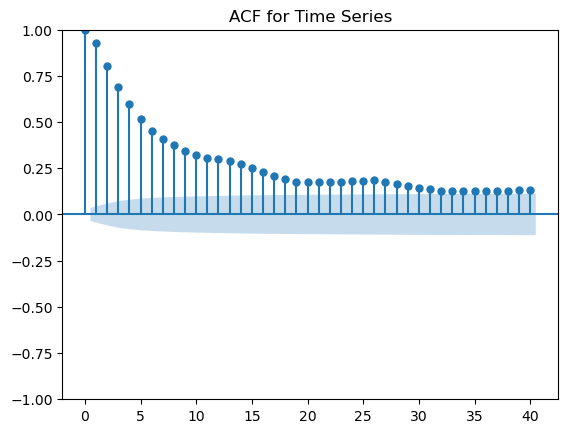

C:\Users\Yoda ji\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



<Figure size 640x480 with 0 Axes>

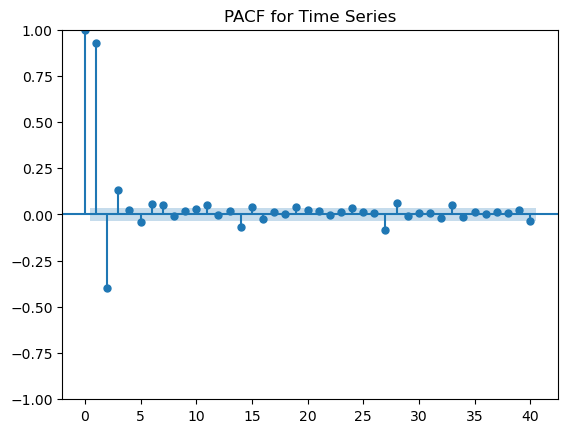

In [3]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


# Plot of ACF
plt.figure()
plot_acf(df['value'], lags=40)  
plt.title('ACF for Time Series')
plt.show()

# Plot of PACF
plt.figure()
plot_pacf(df['value'], lags=40)  
plt.title('PACF for Time Series')
plt.show()


Model Selection:

The ACF plot decays quickly and PACF plot have a significant spike at lag 1, with all subsequent lags within the confidence interval. The strong correlation at lag 1 suggests that the current value of the series is significantly correlated with its immediate past value. Hence,the AR(1) model is supported.


In [4]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


# Using ARIMA(1,0,0) which is the same as AR(1)

model = ARIMA(df['value'], order=(1, 0, 0))
model_fit = model.fit()

next_value = model_fit.forecast()

print(f"Forecasted value: {next_value}")

Forecasted value: 2979    242470.245102
dtype: float64


Forecasted value for 2024-02-08 without handling extreme values: 242470.24

# Assignment2: Forecasting values after handling extreme values

In [5]:
import pandas as pd
import numpy as np


# COVID period start and end dates
covid_start = pd.to_datetime('2020-03-14')
covid_end = pd.to_datetime('2021-01-02')

# Setting values to NaN for the COVID period
df.loc[(df['time'] >= covid_start) & (df['time'] <= covid_end), 'value'] = np.nan

#plotting the DataFrame to visualize the time series with the COVID period removed
fig = px.line(df, x='time', y='value', title='Time Series after Removing COVID Period')
fig.show()


<Figure size 1400x500 with 0 Axes>

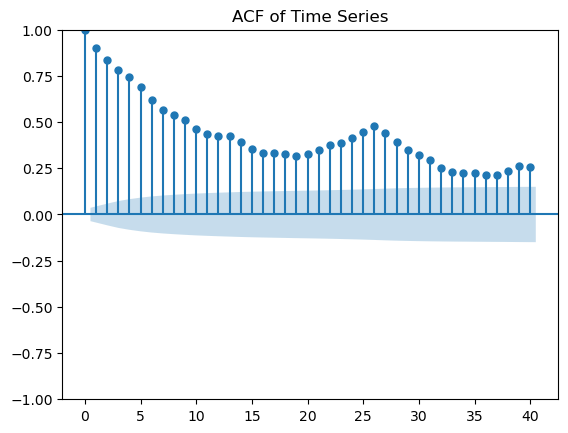

C:\Users\Yoda ji\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



<Figure size 1400x500 with 0 Axes>

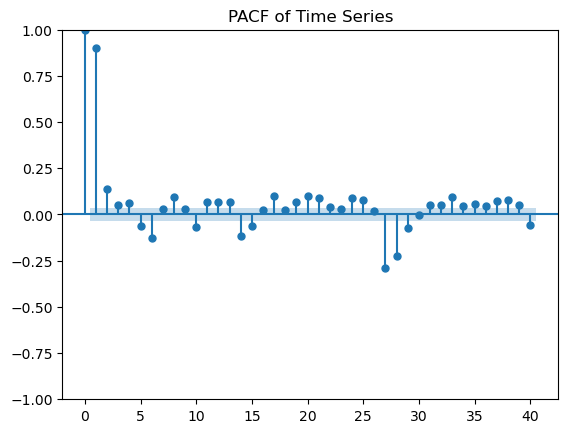

In [6]:
df_cleaned = df.dropna()

# Plot of ACF
plt.figure(figsize=(14, 5))
plot_acf(df_cleaned['value'], lags=40, alpha=0.05)  # Adjust the number of lags as needed
plt.title('ACF of Time Series')
plt.show()

# Plot of PACF
plt.figure(figsize=(14, 5))
plot_pacf(df_cleaned['value'], lags=40, alpha=0.05)  # Adjust the number of lags as needed
plt.title('PACF of Time Series')
plt.show()

In [86]:
model = ARIMA(df['value'], order=(1, 0, 0))
model_fit = model.fit()

# Forecast the next value(s)
forecast = model_fit.forecast(steps=1) 
print(forecast)

2979    242505.796935
dtype: float64


Forecasted value for 2024-02-08 after handling extreme values (without auto ARIMA): 242505.79

In [10]:
import pandas as pd
from pmdarima import auto_arima



# Using auto_arima to find the best ARIMA model
auto_model = auto_arima(df['value'].dropna(),  # drop NA values
                        seasonal=False,        
                        stepwise=True,         
                        trace=True,            
                        error_action='ignore', 
                        suppress_warnings=True,
                        information_criterion='aic')



forecast = auto_model.predict(n_periods=1)  
print(forecast)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=76376.242, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=85936.189, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=76841.527, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=83686.952, Time=0.42 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=76359.195, Time=1.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=82972.637, Time=0.72 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=76372.520, Time=0.71 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=76324.505, Time=1.74 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=82643.462, Time=1.18 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=76218.059, Time=2.59 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=76216.896, Time=8.68 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=76231.194, Time=4.12 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=76325.406, Time=9.90 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=76217.973, Time=8.54 sec
 ARIMA(2,0,4)(0,0,0

Forecasted value for 2024-02-08 after handling extreme values: 233281.45